# Objective:

##### The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
##### While there was some element of luck involved in surviving,it seems some groups of people were more likely to survive than others.
##### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 1. Import the required libraries and modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 2. Load the data set and do EDA:

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df] ## We will use the combine dataset to perform some common operation.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print(pd.isnull(train_df).sum() / len(train_df)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [8]:
train_df['Age'].isnull().sum()

177

### Some observation, 
1. Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
2. Categorical Features: Survived, Sex, Embarked, Pclass
3. Alphanumeric Features: Ticket, Cabin
4. There are a total of 891 passengers in our training set.
5. The Age feature is missing approximately 19.8% of its values. We should handle the missing values.
6. The Cabin feature is missing approximately 77.1% of its values. We can drop this feature.
7. The Embarked feature is missing 0.22% of its values, which should be relatively harmless so no action required.

### Explore the target variable: Survived

In [9]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_df.Survived.value_counts()/len(train_df) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

### Some observation,
1. Since it has just two values 0 and 1 we won't be required to do any feature encoding to the target variable.
2. Almost 62 % of people did not survived the titanic, so truely disastrous event.
3. We will need to analysis this further with respect to different features.

### Explore the independent variables:

In [11]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Passenger ID is the identity column and hence unique.It won't provide us any useful infromation so we will drop the column in data cleaning

#### Survived is our target variable.

#### Pclass

In [12]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage of Pclass 1 who survived: 62.96296296296296
Percentage of Pclass 2 who survived: 47.28260869565217
Percentage of Pclass 3 who survived: 24.236252545824847


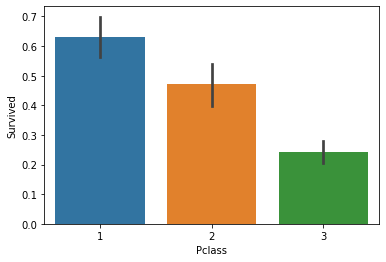

In [13]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
Pclass1 = train_df["Survived"][train_df["Pclass"] == 1].value_counts(normalize = True)[1]*100
Pclass2 = train_df["Survived"][train_df["Pclass"] == 2].value_counts(normalize = True)[1]*100
Pclass3 = train_df["Survived"][train_df["Pclass"] == 3].value_counts(normalize = True)[1]*100
print(f"Percentage of Pclass 1 who survived: {Pclass1}")
print(f"Percentage of Pclass 2 who survived: {Pclass2}")
print(f"Percentage of Pclass 3 who survived: {Pclass3}")

### Some observation
1. Survival rate increases as the Pclass decreases or in other word, 
2. Upper class(1) has a higher chance of survival then the Middle(2) and Lower class(3) 
3. Lower class has lowest survival rate (Which is unfortunate but as expected)

#### Name this again a unique column and won't add any significant importance hence we can drop this as well.

#### Sex

In [14]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


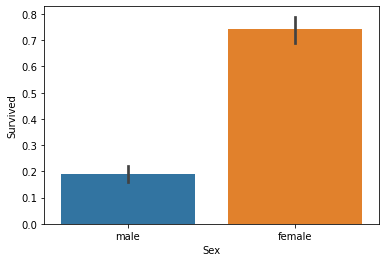

In [15]:
sns.barplot(x="Sex", y="Survived", data=train_df)

#print percentages of females vs. males that survive
female = train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize = True)[1]*100
male = train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize = True)[1]*100
print(f"Percentage of females who survived: {female}")
print(f"Percentage of males who survived: {male}")

### Some observations
1. Female have higher chance of survival then male which is expected as prefrence was given to child and womens.
2. It will be intesting to see if pClass has any impact on female survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

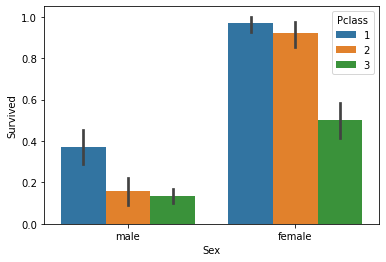

In [16]:
sns.barplot(y = 'Survived', x = 'Sex', hue = 'Pclass', data=train_df)   

### Some Observation
1. Irrespective of class, Male always have lower chance of survival.
2. Survival rate for Females does significantly lowered in lower class

#### Age

In [17]:
train_df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

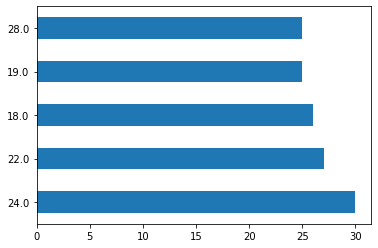

In [18]:
# Lets check top 5 age group
train_df.Age.value_counts().nlargest(5).plot.barh(); 

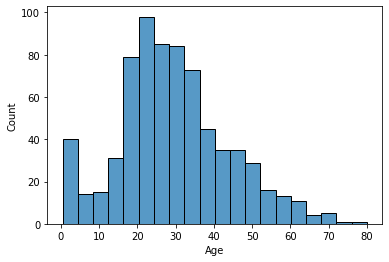

In [19]:
sns.histplot(x='Age', data=train_df, bins=20);

<AxesSubplot:xlabel='Age', ylabel='Survived'>

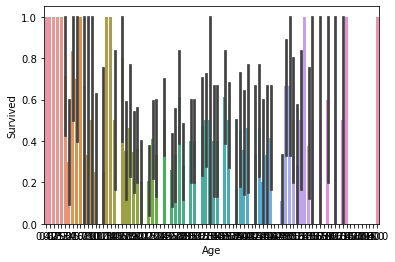

In [20]:
sns.barplot(x="Age", y="Survived", data=train_df) 

#### SibSp

In [21]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

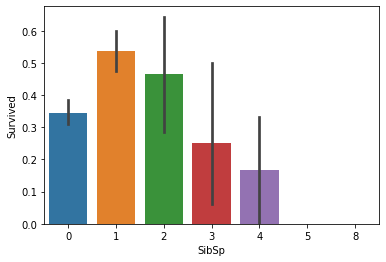

In [22]:
sns.barplot(x="SibSp", y="Survived", data=train_df)

### Some observation
1. As number of sibling increases, chances of survival decreases.
2. Exception to this is people having no sibling, they have survival rate lower than people with 1 and 2 siblings. 
3. May be this is because crew and staff members possibly have no sibling on board and are less likely to survive. But this is just a speculation.

#### Parch

In [23]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

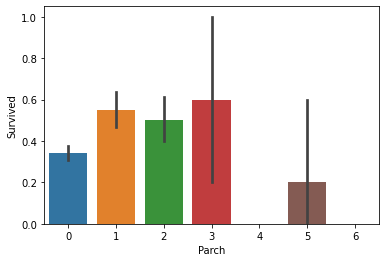

In [24]:
sns.barplot(x="Parch", y="Survived", data=train_df)

### Some Observations:
1. Pepole travelling with more than 4 parent or child are less likely to survive.
2. Also people who don't have any parent or child are also survived less than people having 1 to 3 parent/child. This is consistant with Sibling data

#### Ticket, unique column less likley to impact survival so dropping the feature.

#### Fare
#### fare is discreate numerical feature we may need to do feature engineering for optimize result

<AxesSubplot:xlabel='Fare', ylabel='Density'>

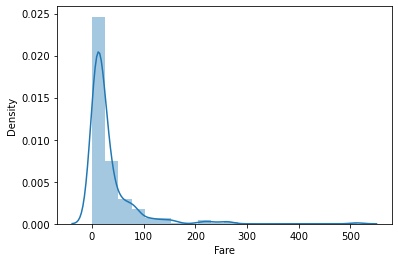

In [25]:
sns.distplot(train_df['Fare'], bins = 20, kde = True, vertical = False) 

#### Cabin, Cabin has high percentage of missing data, we will drop this feature

In [26]:
train_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

#### Embarked

In [27]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Percentage of Embarked S who survived: 33.69565217391305
Percentage of Embarked C who survived: 55.35714285714286
Percentage of Embarked Q who survived: 38.961038961038966


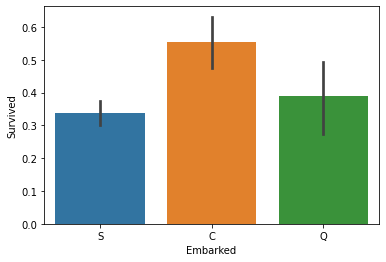

In [28]:
sns.barplot(x="Embarked", y="Survived", data=train_df)
embS = train_df["Survived"][train_df["Embarked"] == 'S'].value_counts(normalize = True)[1]*100
embC = train_df["Survived"][train_df["Embarked"] == 'C'].value_counts(normalize = True)[1]*100
embQ = train_df["Survived"][train_df["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100
print(f"Percentage of Embarked S who survived: {embS}")
print(f"Percentage of Embarked C who survived: {embC}")
print(f"Percentage of Embarked Q who survived: {embQ}")

### Some Observation
1. People have embarked mostly from Southampton, but they have lowest survival rate
2. People who embarked from Cherbourg have most survival rate.

# Conclusion of EDA
1. Age is important feture but has missing values, we will need to handle it while data preprocessing.
2. PassengerId is Identity column, we will drop it.
3. Survived is the target variable
4. Name is Unique column, we will drop it.
5. We will need to perform feture encoding on Sex and Embarked. We can use getDummies funtion from pandas library
6. Females have high rate of surviver than Males
7. As number of Sibling or parent/child increase, survival rate decrease with exception of people having no sibling or travelling alone.
8. Ticket is Unique column, we will drop it.
9. Cabin has high percentage of missing data, hence we will drop it.

# 3. Data Preprocessing

### Handle missing values

In [29]:
train_df['Embarked'].isnull().sum()

2

In [30]:
# There are only 2 missing values so we can fill them with mode value
# replacing the missing values in the Embarked feature with S. as S is the largest
train_df = train_df.fillna({"Embarked": "S"})

In [31]:
train_df['Embarked'].isnull().sum()

0

In [32]:
train_df['Age'].isnull().sum()

177

In [33]:
train_df.Age = train_df.Age.fillna(value=train_df.Age.mean())

In [34]:
train_df['Age'].isnull().sum()

0

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Cleaning

In [37]:
# Drop the unrequired columns - 'PassengerId', 'Name', 'Ticket' and 'Cabin'
train_df = train_df.drop(['PassengerId'], axis = 1)
test_df = test_df.drop(['PassengerId'], axis = 1)

train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Feature Encoding:

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
# Here we are doing onehotencoding for categorical columns such as Sex, Embarked
train_df = pd.get_dummies(train_df,drop_first=True)

In [42]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Feature Scaling:

In [43]:
## independent and dependent features

X = train_df.iloc[:, :-1].values # idependent
y = train_df.iloc[:, -1].values # dependent

In [44]:
### Applying Standard scaling to get optimized result
sc = StandardScaler()
X = sc.fit_transform(X)

#  4. Train Test Data Split
- Here the dataset will first need to be separated into X = independent variables and y = target variable.
- Then dataset will be split into train and test datasets. We will use 80 - 20 split
- random_state = 42 is used for reproduction
- Fun Fact: Number 42 is used as an inside joke in the scientific and sci-fi community and it is derived from 'Hitchhiker’s Guide to the Galaxy. The number 42 also has a Wikipedia page for many pop culture references.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 5. Model Selection, Model Training and prediction

In [46]:

# First initialize the list variables to store different outputs
# We will use this later to compare all the different ML alorithms 
lst_model = []
lst_accuracy  = []
lst_accuracy_train = []
lst_accuracy_test = [] 
lst_cv_score = []
lst_TP = []
lst_TN = []
lst_FP = []
lst_FN = []

# fuction : accepts input model which is nothing but object instantiated of an algos
def applyMLmodel(model):
    # train the model
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test) * 100
    lst_accuracy.append(accuracy)
    print("Accuracy :", accuracy)
    
    # cross-validation , y_train.ravel() is similar to y_train.reshape(-1)
    cv = cross_val_score(estimator = model, X = X_train, y = y_train.ravel(), cv = 10)
    lst_cv_score.append(cv.mean())
    print("CV Score :", cv.mean())
    
    # predicting accuracy for training data set
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    lst_accuracy_train.append(accuracy_train)
    print("Accuracy(Training) :", accuracy_train)

    # predicting accuracy for test data set
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    lst_accuracy_test.append(accuracy_test)
    print("Accuracy(Test) :", accuracy_test)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix :")
    print(cm)

    # storing TN,TP,FN and FP as a part of list
    lst_TN.append(cm[0,0])
    lst_FP.append(cm[0,1])
    lst_FN.append(cm[1,0])
    lst_TP.append(cm[1,1])

### LogisticRegression

In [47]:
model = LogisticRegression()
applyMLmodel(model) 
lst_model.append("LogisticRegression")

Accuracy : 76.53631284916202
CV Score : 0.8244718309859156
Accuracy(Training) : 0.8300561797752809
Accuracy(Test) : 0.7653631284916201
Confusion Matrix :
[[ 19  41]
 [  1 118]]


### DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier()
applyMLmodel(model)
lst_model.append("DecisionTreeClassifier")

Accuracy : 84.91620111731844
CV Score : 0.856924882629108
Accuracy(Training) : 0.9957865168539326
Accuracy(Test) : 0.8491620111731844
Confusion Matrix :
[[ 44  16]
 [ 11 108]]


### RandomForestClassifier

In [49]:
model = RandomForestClassifier()
applyMLmodel(model)
lst_model.append("RandomForestClassifier")

Accuracy : 83.24022346368714
CV Score : 0.8343896713615022
Accuracy(Training) : 0.9957865168539326
Accuracy(Test) : 0.8324022346368715
Confusion Matrix :
[[ 33  27]
 [  3 116]]


### KNeighborsClassifier

In [50]:
model =KNeighborsClassifier()  
applyMLmodel(model)
lst_model.append("KNeighborsClassifier")

Accuracy : 74.30167597765363
CV Score : 0.8007042253521128
Accuracy(Training) : 0.8455056179775281
Accuracy(Test) : 0.7430167597765364
Confusion Matrix :
[[ 22  38]
 [  8 111]]


### GaussianNB

In [51]:
model = GaussianNB()
applyMLmodel(model)
lst_model.append("GaussianNB")

Accuracy : 77.09497206703911
CV Score : 0.8258998435054773
Accuracy(Training) : 0.8356741573033708
Accuracy(Test) : 0.770949720670391
Confusion Matrix :
[[ 19  41]
 [  0 119]]


### Comparing and visaulizing the results of ML algorithms

In [52]:
# We will first convert all the list of outputs into dataframe which will be easy to compare and visuallize
predictiondf = pd.DataFrame({'Model': np.array(lst_model),
                             'Accuracy': np.array(lst_accuracy),
                             'Accuracy(Training)' : np.array(lst_accuracy_train),
                             'Accuracy(Test)' : np.array(lst_accuracy_test),
                             'CV Score' : np.array(lst_cv_score),
                             'True Positive' : np.array(lst_TP),
                             'True Negative' : np.array(lst_TN),
                             'False Positive' : np.array(lst_FP),
                             'False Negative' : np.array(lst_FN)
                            })
predictiondf

,Model,Accuracy,Accuracy(Training),Accuracy(Test),CV Score,True Positive,True Negative,False Positive,False Negative
0,LogisticRegression,76.536313,0.830056,0.765363,0.824472,118,19,41,1
1,DecisionTreeClassifier,84.916201,0.995787,0.849162,0.856925,108,44,16,11
2,RandomForestClassifier,83.240223,0.995787,0.832402,0.834390,116,33,27,3
3,KNeighborsClassifier,74.301676,0.845506,0.743017,0.800704,111,22,38,8
4,GaussianNB,77.094972,0.835674,0.770950,0.825900,119,19,41,0


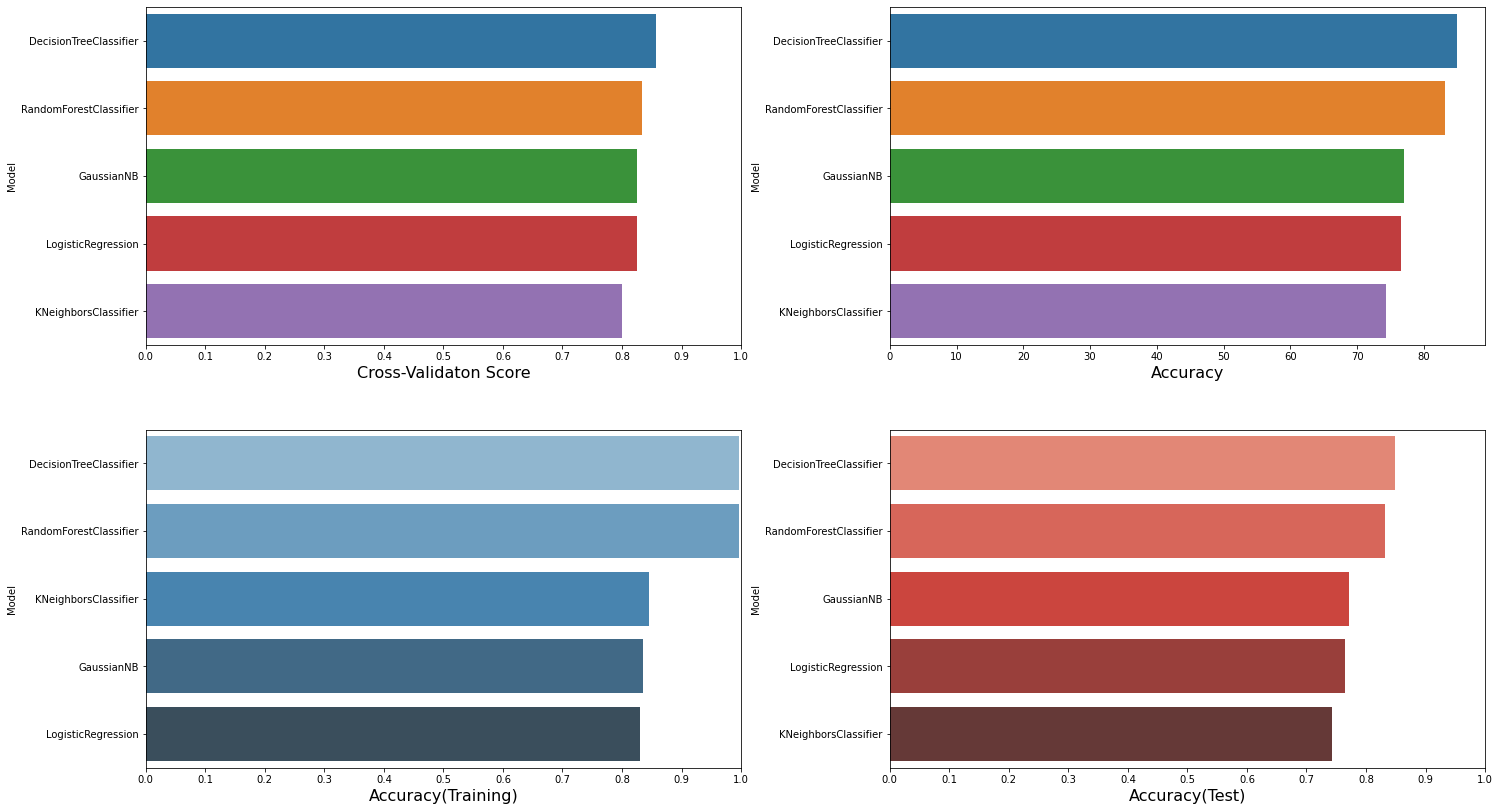

In [53]:
fig, ax = plt.subplots(2,2, figsize=(24,14))
plt.subplots_adjust(wspace = .25, hspace = .25)
#comparing CV score
predictiondf.sort_values(by=['CV Score'], ascending=False, inplace=True)

sns.barplot(x='CV Score', y='Model', data = predictiondf, ax = ax[0][0])
ax[0][0].set_xlabel('Cross-Validaton Score', size=16)
ax[0][0].set_ylabel('Model')
ax[0][0].set_xlim(0,1.0)
ax[0][0].set_xticks(np.arange(0, 1.1, 0.1))

#comparing accuracy
predictiondf.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = predictiondf, ax = ax[0][1])
ax[0][1].set_xlabel('Accuracy', size=16)
ax[0][1].set_ylabel('Model')

#comparing accuracy(training)
predictiondf.sort_values(by=['Accuracy(Training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(Training)', y='Model', data = predictiondf, palette='Blues_d', ax = ax[1][0])
ax[1][0].set_xlabel('Accuracy(Training)', size=16)
ax[1][0].set_ylabel('Model')
ax[1][0].set_xlim(0,1.0)
ax[1][0].set_xticks(np.arange(0, 1.1, 0.1))

#comparing accuracy(testing)
predictiondf.sort_values(by=['Accuracy(Test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(Test)', y='Model', data = predictiondf, palette='Reds_d', ax = ax[1][1])
ax[1][1].set_xlabel('Accuracy(Test)', size=16)
ax[1][1].set_ylabel('Model')
ax[1][1].set_xlim(0,1.0)
ax[1][1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

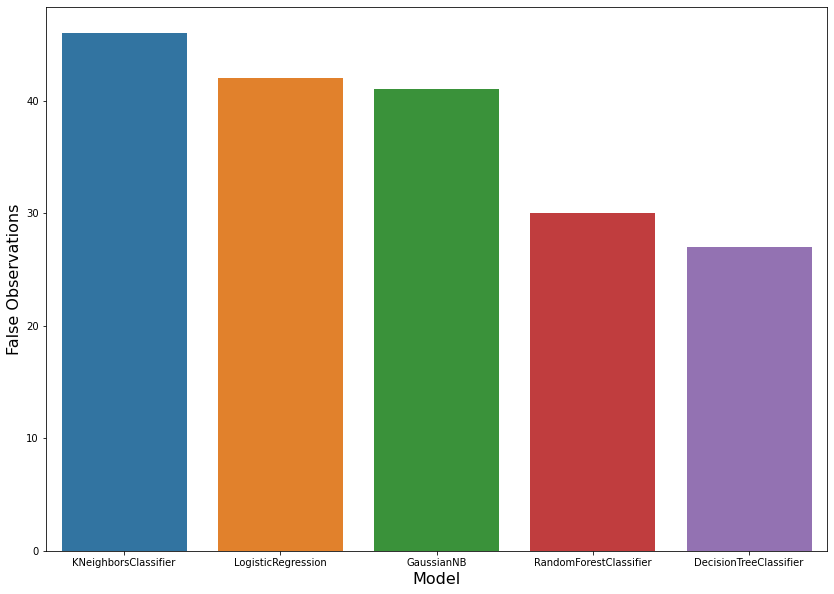

In [54]:
# Comparing how many false prediction made by each model
predictiondf.sort_values(by=(['Accuracy(Test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(14,10))
sns.barplot(x = predictiondf['Model'], y=predictiondf['False Positive'] + predictiondf['False Negative'], ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('False Observations', size=16)

plt.show()

### Final Conclusion

Decision Tree Classifier gives highest accuracy and thus gives lowest number of false observation. We should use Decision Tree Classifier to predict the titanic data.